## Homework 4: Fourier Analysis

## Due date: 

### Student Name:

**Exercise 1.**

a.- Find the Fourier series of the function $f(x) := x$ in the
interval $[-\pi,\pi]$.

b.- Use Parseval's relation to prove that 
\begin{equation*}
  \sum_{n=1}^{\infty} \frac{1}{n^2} = \pi^2/6
\end{equation*}




**Exercise 2.**

a.- Find the Fourier series of the function $f(x):= e^{sx}$ in the
interval $[-\pi, \pi]$.

b.- Use Parseval's relation to prove that 
\begin{equation*}
  \pi coth(\pi s)/s = \sum_{n=-\infty}^{\infty} \frac{1}{s^2+n^2}
\end{equation*}




**Exercise 3.**

Let $S_n: L^2 \to L^2$ be the map that sends $f \in L^2$ to the partial
Fourier series,
\begin{equation*}
  S_n(f) := \sum_{m=-n}^{n} c_m e^{imx}, \;\;\;\;\;\;\; 
                 c_m:= \frac{1}{2\pi}\langle e^{imx},f(x) \rangle.
\end{equation*}
Show that the $S_n$ are orthogonal projections and that 
$S_n S_m = S_m S_n = S_m$ if $m \leq n$.



**Exercise 4. Use of the Fourier Interpolation**

Compute the Fourier Interpolation of the functions of above (for $s= 1, 3, 3i$) and plot it along the Fourier series coefficients. Below is an example:

In [2]:
using Pkg
Pkg.instantiate()
using FFTW
using Plots

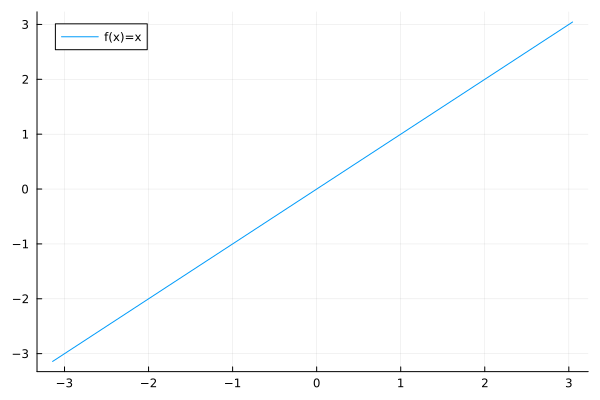

In [21]:
N = 65
f(x) = x
#f(x) = x*sign(x)
xi = -π
xf = π
xv = [xi + (xf-xi)*(i-1)/N for i in 1:N]
fv = f.(xv)
plot(xv,fv, label="f(x)=x")

The Fourier coefficients of $f(x)=x$ in the interval $[-π,π]$ are $b_n=-i(-1)^n/n$, $n\neq 0$, $a_0 = 0$. While the Fourier Interpolant is: $i_n = 2π(-1)^n/(e^{i2πn}-1)/N$. 

For $f(x)=xsign(x)$ we have: $a_n = 2N/n^2/π$ and $in =  

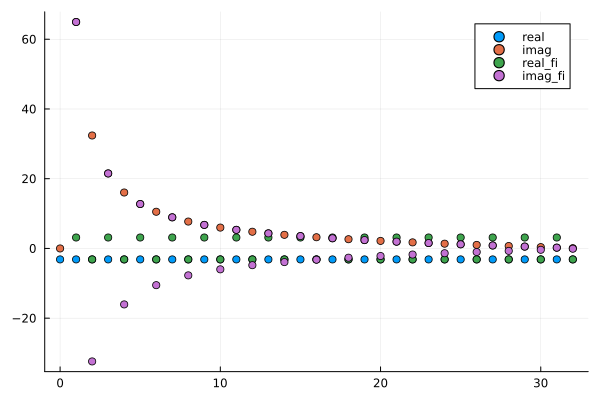

In [34]:
freq = fftshift(rfftfreq(N))*N
rft = rfft(fv)
#fftf = fft(fv)
bn = (-1).^(freq*N) ./freq #for f(x)=x
an = 1 ./ (freq.^2)/N/π*2 #for f(x)=x*sign(x)
in = 2*π*(-1).^(freq) ./(  exp.(im*2*π*freq/N) .- 1)
scatter(freq,real.(rft), label="real")
scatter!(freq,imag.(rft), label="imag")
#scatter!(freq,bn, label = "(-1)^n/n")
#scatter!(freq,an, label="2N/π/n^2")
scatter!(freq,real.(in), label="real_fi")
scatter!(freq,imag.(in), label="imag_fi")
#scatter!(freq,imag.(fftf))
#scatter!(freq,real.(fftf))

We get a constant real component and not the oscillation...
For the function $f(x) = x sign(x)$ it is OK, so it seems that it only works for continuous functions. Is it that Fourier Interpolation is so different for non-continuos functions?

In [23]:
bn;

In [24]:
freq*N;

In [25]:
rft;

In [26]:
xv;

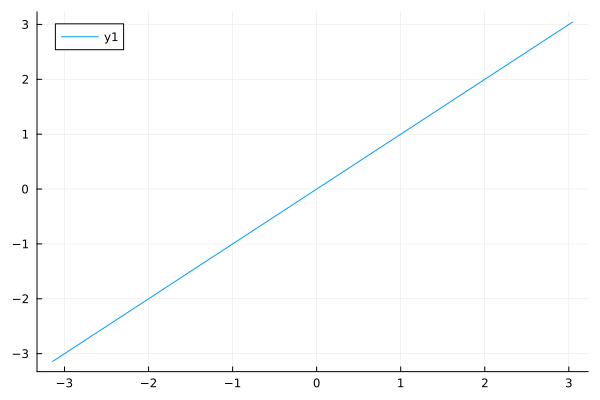

In [27]:
plot(xv,irfft(rft,N))

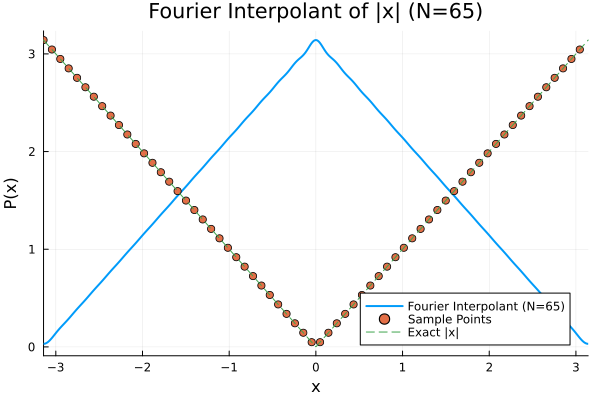

In [28]:

function fourier_interpolant_abs_x(N=65)
    # Step 1: Discretize |x| on [-π, π]
    x_k = LinRange(-π, π, N+1)[1:end-1]  # N points (exclude duplicate endpoint)
    f_k = abs.(x_k)

    # Step 2: Compute DFT coefficients (normalized)
    F_n = fft(f_k) / N

    # Step 3: Reorder frequencies for trigonometric interpolant
    # Shift zero frequency to center (for plotting/analysis)
    F_n_shifted = fftshift(F_n)
    n = fftshift(fftfreq(N)) * N  # Frequencies: [-32, -31, ..., 0, ..., 31, 32]

    # Step 4: Define the interpolant function
    function P(x)
        sum = 0.0 + 0.0im
        for (i, n_val) in enumerate(n)
            sum += F_n_shifted[i] * exp(im * n_val * x)
        end
        real(sum)  # Return real part (imaginary part is zero for even functions)
    end

    # Step 5: Plot results
    x_fine = LinRange(-π, π, 1000)  # Fine grid for plotting
    P_fine = [P(x) for x in x_fine]

    plot(x_fine, P_fine, label="Fourier Interpolant (N=65)", linewidth=2)
    plot!(x_k, f_k, seriestype=:scatter, label="Sample Points", markersize=4)
    plot!(x_fine, abs.(x_fine), label="Exact |x|", linestyle=:dash)
    title!("Fourier Interpolant of |x| (N=65)")
    xlabel!("x")
    ylabel!("P(x)")
    xlims!(-π, π)
    display(plot!())
end

# Run the function
fourier_interpolant_abs_x(65)

In [12]:
fftshift(fftfreq(N)) * N


-32.0:1.0:31.0

In [16]:
rfftfreq(N)*N

33-element Frequencies{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
  ⋮
 24.0
 25.0
 26.0
 27.0
 28.0
 29.0
 30.0
 31.0
 32.0